In [ ]:
import sys
sys.path.append("XXX")
import numpy as np
import matplotlib.pyplot as plt
from main import (
    GaussianProcess, 
    calc_kernel_rbf
)

class MYGP(GaussianProcess):
    def __init__(self, x: np.ndarray, y: np.ndarray, kern_params: dict) -> None:
        super().__init__(x, y, kern_params)
    def calc_kernel_func(self, x, y, kern_params):
        return calc_kernel_rbf(x, y, kern_params['sig'])

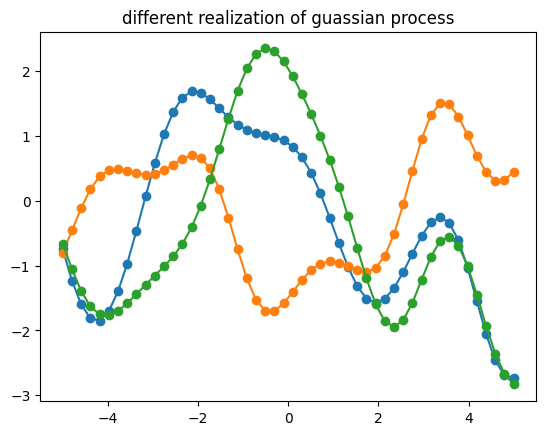

In [3]:
x = np.linspace(-5., 5., 50).reshape(-1, 1)
cov = calc_kernel_rbf(x, x, 1.)

for i in range(3):
    y = np.random.multivariate_normal(mean=np.zeros_like(x).flatten(), cov=cov)
    plt.plot(x, y, marker='o')
plt.title('different realization of guassian process')
plt.show()


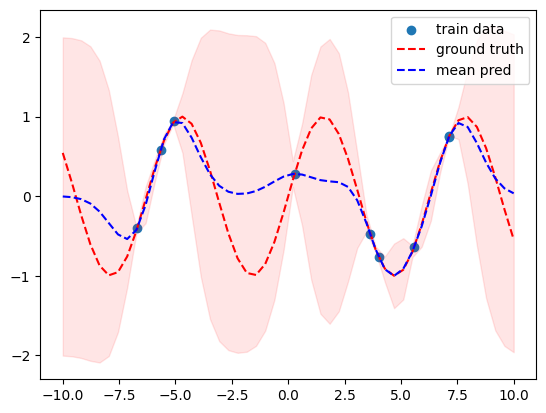

In [4]:

xtrn = np.random.uniform(-8., 8., 9).reshape(-1, 1)
ytrn = np.sin(xtrn)

xtst = np.linspace(-10., 10., 50).reshape(-1, 1)
ytst = np.sin(xtst)

gp = MYGP(xtrn, ytrn, {'sig':1.})

mean_tst, cov_tst = gp.infere(xtst)
gp.plot(xtst.flatten(), ytst.flatten(), mean_tst.flatten(), cov_tst)
plt.legend()
plt.show()